# Project resource polygons onto road network

Import numpy module:

In [1]:
import numpy as np

Import own custom module(s):

In [2]:
from geotools.network import Road
from geotools.layer import PolygonLayer
from toolset.list import split_list_by_index

Build road network and biomass pseudo resource polygons:

In [3]:
road = Road("/home/benjamin/Documents/Post-doc Guyane/Data/Geo layers/Road network/main_road_network.shp")
biomass = PolygonLayer("/home/benjamin/Documents/Post-doc Guyane/Data/Results/Biomass/resource_polygons.geojson")

Project biomass polygon resources onto road network (and retrieve points):

In [4]:
points = biomass.project(road)

Find nearest existing points within each road segment:

In [5]:
nearest_segment_points = road.nearest_point_in_layer(points)

Plot everything:

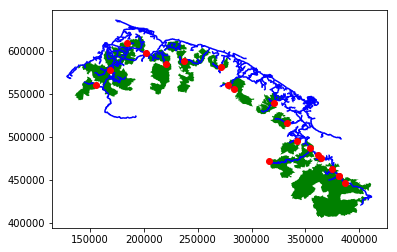

In [6]:
road.plot(layer_color="blue", zorder=1)
biomass.plot(layer_color="green", zorder=0)
points.plot(layer_color="red", zorder=2)

In [7]:
nearest_segment_points

[(594, 593),
 (609, 3),
 (652, 0),
 (663, 47),
 (765, 142),
 (767, 19),
 (775, 729),
 (807, 0),
 (1009, 43),
 (1063, 21),
 (1743, 0),
 (1764, 579),
 (1847, 164),
 (1911, 425),
 (1939, 192),
 (1953, 349),
 (1970, 374),
 (2028, 119),
 (2193, 164),
 (2206, 154)]

Here, nearest segment points are given as a list where each tuple stands for: (segment number, point index within segment).
Look at those points:

In [8]:
nearest_points = road.get_underlying_points_as_new_layer(nearest_segment_points)

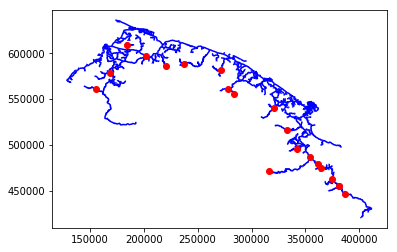

In [9]:
road.plot(layer_color="blue", zorder=0)
nearest_points.plot(layer_color="red", zorder=1)

In [10]:
test = road.get_underlying_points_as_new_layer()

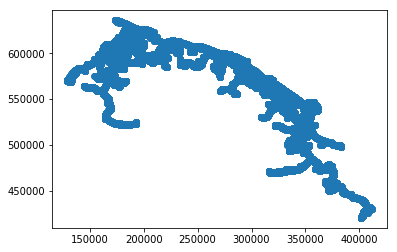

In [11]:
test.plot()

In [12]:
len(test)

142340

Try to split road at underlying points:

Compute travel time from original road:

In [13]:
t_time = road.travel_time('ETAT', {'Non revêtu': 70, 'Revêtu': 90, 'Sentier': 50, "Chemin d'exploitation": 40},
                                  'ETAT', {'Non revêtu': 0.015, 'Revêtu': 0.01, 'Sentier': 0.02,
                                           "Chemin d'exploitation": 0.02}, acceleration_rate=1.5, gross_hp=500,
                                  vehicle_weight=30000, speed_format='km/h')

Split road layer and travel time with respect to new points:

In [14]:
road_test, t_time_one_way, t_time_reverse = road.split_at_underlying_points(nearest_segment_points, 
                                                                            t_time["one-way"], t_time["reverse"])